<a href="https://colab.research.google.com/github/GermanMacias/CienciaDeDatos_EAN/blob/main/GUIA_3_GRUPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESARROLLO GUÍA 3

#Integrantes
##### German Macías
##### Mauricio Herrera
##### Milena Páramo Bernal

In [58]:
#LIBRERIAS
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

##ACTIVIDAD 1

Se procede a hacer el cargue y limpieza de datos de las dos bases de datos secop I y II:

In [59]:


# Cargar los datos desde un archivo CSV
data = pd.read_csv('/content/datos_secop_I_modified.csv')

print(data.head ())


   identificador_paa  codigo_entidad  \
0             303062        28500134   
1             294652       205001279   
2             259436       286571031   
3             263541       205001191   
4             298985       250226019   

                                      nombre_entidad  nit_entidad  anno_paa  \
0                 CASANARE  ESE HOSPITAL DE YOPAL !     891855029      2022   
1  ANTIOQUIA  INSTITUCIN EDUCATIVA DBORA ARANGO P...    900196642      2022   
2  PUTUMAYO  CENTRO EDUCATIVO RURAL SAUDITA  PUER...  846004233-5      2021   
3  ANTIOQUIA  INSTITUCIN EDUCATIVA SAN CRISTBAL  ...    811017472      2021   
4  META  CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...  900134298-9      2022   

                                   direccion_entidad telefono_entidad  \
0  Calle 15 N 795 Manzana L via marginal de la selva          6344699   
1                                  Calle 118  103160          5294058   
2                                     VEREDA SAUDITA       320833


cargue correcto del primera tabla, sin embargo se presenta dificultad al intentar cargar, y se procede hacer pruebas y ajustes para el cargue correcto:

In [60]:

#cargue del primer archivo

#intentando prueba solo dejando ";" como delimitador,
## se hace el proceso porque se había detectado error en la linea 34, revisando la data uno de los errores
## podría ser que se confunda los delimitadores por "," y ";"
archivo_path = '/content/datos_secov_II_modified.csv'

try:
    data2 = pd.read_csv(archivo_path, delimiter=';', encoding='utf-8')
    status = "Prueba correcta al cargar el archivo usando ';' como delimitador"
except Exception as e:
    status = f"Error al cargar el archivo: {str(e)}"

#diagnostico
status


"Error al cargar el archivo: 'utf-8' codec can't decode byte 0xc1 in position 34: invalid start byte"

In [61]:
#intentando prueba solo dejando ";" como delimitador e ignorando errores de codificación

try:
    data2 = pd.read_csv(archivo_path, delimiter=';', encoding='utf-8', encoding_errors='ignore')
    status2 = "Prueba correcta al cargar el archivo usando ';' como delimitador e ignorando errores de codificación"
except Exception as e:
    status2 = f"Error al cargar el archivo: {str(e)}"

status2

"Prueba correcta al cargar el archivo usando ';' como delimitador e ignorando errores de codificación"

In [62]:
print(data2.head (3))

  identificador_unico id_plan_anual_de_adquisiciones  anno nit_entidad  \
0     CO1.APP.2041264           MarketplaceCO1538159  2024   721520377   
1     CO1.APP.2041602           MarketplaceCO1538240  2024   718938582   
2     CO1.APP.2041198           MarketplaceCO1538184  2024   703036004   

                                    nombre_entidad  \
0  INSTITUCION EDUCATIVA AGROPECUARIA MAXIMO GOMEZ   
1       INSTITUCION EDUCATIVA MUNICIPAL EL SOCORRO   
2                              MUNICIPIO LA DORADA   

                                       mision_vision  \
0  MISION 2023 2026 La Institucin Educativa Agrop...   
1  MISION Brindar una formacin acadmica que forme...   
2  La administracin municipal regir los destinos ...   

                             perspectiva_estrategica  \
0  Ser una institucin destacada por sus estrategi...   
1  El proceso de formacin de los educandos debe e...   
2  La Dorada ser un municipio competitivo y soste...   

                 nombre_contacto tel

In [63]:
data.columns

Index(['identificador_paa', 'codigo_entidad', 'nombre_entidad', 'nit_entidad',
       'anno_paa', 'direccion_entidad', 'telefono_entidad', 'mision_y_vision',
       'perspectiva_estrategica', 'info_contacto', 'ppto_total',
       'limite_menor_cuantia', 'limite_minima_cuantia',
       'fecha_ultima_actualizacion', 'fecha_cargue', 'municipio_paa',
       'departamento_paa', 'localidad_paa', 'codigo_municipio'],
      dtype='object')

In [64]:
data2.columns

Index(['identificador_unico', 'id_plan_anual_de_adquisiciones', 'anno',
       'nit_entidad', 'nombre_entidad', 'mision_vision',
       'perspectiva_estrategica', 'nombre_contacto', 'telefono_contacto',
       'correo_contacto', 'valor_presupuesto_general',
       'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia',
       'fecha_de_publicacion', 'fecha_de_creacion',
       'fecha_de_ultima_modificacion', 'version',
       'identificador_requerimiento_compra', 'estado', 'departamento_paa',
       'municipio_paa'],
      dtype='object')

In [65]:


#cruce de tabla usando inner

inner_data = pd.merge(data, data2, on='nit_entidad', how='inner')
inner_data.head()


,identificador_paa,codigo_entidad,nombre_entidad_x,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica_x,info_contacto,...,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa_y,municipio_paa_y


No hay coincidencias usando inner join, buscando en la documentación secop i y ii se diferencia si el proceso fue en fisico o un registro en linea, por lo que se procese a unir la tablas de forma vertical, agregando una columna donde identifique si es fisico o digital, y depurando las bases dejando la unión de las tablas:

In [66]:
# Crear la base de datos 'data_combi_completa' uniendo 'data' y 'data2', y depurar según los nombres de columnas indicados

# Selección y renombrado de columnas para 'data' (SECOP I)
data_selected = data[['identificador_paa', 'anno_paa', 'nit_entidad', 'nombre_entidad',
                      'direccion_entidad', 'telefono_entidad', 'mision_y_vision',
                      'perspectiva_estrategica', 'ppto_total', 'limite_menor_cuantia',
                      'limite_minima_cuantia', 'fecha_ultima_actualizacion',
                      'fecha_cargue', 'municipio_paa', 'departamento_paa']].copy()

data_selected.columns = ['identificador_unico', 'anno', 'nit_entidad', 'nombre_entidad',
                         'correo_x_direccion', 'telefono_contacto', 'mision_vision',
                         'perspectiva_estrategica', 'presupuesto_total',
                         'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia',
                         'fecha_de_ultima_modificacion', 'fecha_creacion_cargue',
                         'municipio_paa', 'departamento_paa']

data_selected['plataforma'] = 'fisico'

# Selección y renombrado de columnas para 'data2' (SECOP II)
data2_selected = data2[['identificador_unico', 'anno', 'nit_entidad', 'nombre_entidad',
                        'correo_contacto', 'telefono_contacto', 'mision_vision',
                        'perspectiva_estrategica', 'valor_presupuesto_general',
                        'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia',
                        'fecha_de_ultima_modificacion', 'fecha_de_creacion',
                        'municipio_paa', 'departamento_paa']].copy()

data2_selected.columns = ['identificador_unico', 'anno', 'nit_entidad', 'nombre_entidad',
                          'correo_x_direccion', 'telefono_contacto', 'mision_vision',
                          'perspectiva_estrategica', 'presupuesto_total',
                          'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia',
                          'fecha_de_ultima_modificacion', 'fecha_creacion_cargue',
                          'municipio_paa', 'departamento_paa']

data2_selected['plataforma'] = 'digital'

# Unión de ambas tablas
data_combi_completa = pd.concat([data_selected, data2_selected], ignore_index=True)

# Mostrar la tabla combinada con la columna 'plataforma' correctamente añadida
data_combi_completa.head()




,identificador_unico,anno,nit_entidad,nombre_entidad,correo_x_direccion,telefono_contacto,mision_vision,perspectiva_estrategica,presupuesto_total,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_ultima_modificacion,fecha_creacion_cargue,municipio_paa,departamento_paa,plataforma
0,303062,2022,891855029,CASANARE ESE HOSPITAL DE YOPAL !,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,126898133557,NaN,$nan,12/31/21,2022-01-31T11:53:47.000,Yopal,Casanare,fisico
1,294652,2022,900196642,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,Calle 118 103160,5294058,MISION La Institucin Educativa Dbora Arango de...,Direccionar la Institucin para el logro del ho...,$84026639,0,20000000,12/1/21,2022-01-26T09:43:07.000,Medellín,Antioquia,fisico
2,259436,2021,846004233-5,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,VEREDA SAUDITA,3208339785,MISION El Centro Educativo Rural Saudita garan...,0,$107700000,254387280,$25438728,11/27/20,2021-01-28T02:34:58.000,Puerto Guzmán,Putumayo,fisico
3,263541,2021,811017472,ANTIOQUIA INSTITUCIN EDUCATIVA SAN CRISTBAL ...,Carrera 131 No 65 07,4279180,2021,wwwiesancristobaleduco,La Institucin educativa San Cristbal Lder en l...,JOSE CHARLES VELEZ BETANCURRectoriesancristoba...,159239220,181705200,2021-01-29T04:15:31.000,Medellín,Antioquia,fisico
4,298985,2022,900134298-9,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,Vda Caney Medio Km2CumaralMeta,3013604535,Misin,Mejoramiento de la calidad educativa en la pre...,$22500000,280000000,$28000000,12/2/21,2022-01-28T07:06:52.000,Cumaral,Meta,fisico


In [67]:
# Identificación del Tipo de Dato
data_combi_completa.dtypes


,0
identificador_unico,object
anno,int64
nit_entidad,object
nombre_entidad,object
correo_x_direccion,object
telefono_contacto,object
mision_vision,object
perspectiva_estrategica,object
presupuesto_total,object
presupuesto_menor_cuantia,object


Se había dectectado errores en las bases de datos, por lo que se procede a cambiar a un tipo los datos y hacer una depuración de las mismas, ya que hay unos datos que están corridos por problemas de delimitador

In [68]:
# Eliminar el simbolo "$" de la columna 'ppto_total'
data_combi_completa['presupuesto_total'] = data_combi_completa['presupuesto_total'].str.replace('$', '')

In [69]:
# Pasar tipo de datos a los correctos
# se convierte la variable de 'presupuesto_total' como numero, pasando errores y los NaN se eliminan para evitar dañar las estadisticas o gráficas que se intenten hacer
data_combi_completa['presupuesto_total'] = pd.to_numeric(data_combi_completa['presupuesto_total'], errors='coerce') #
data_combi_completa = data_combi_completa.dropna(subset=['presupuesto_total'])

In [70]:
# Ajustar el código según las nuevas instrucciones

#Convertir solo 'presupuesto_total' a número
data_combi_completa['presupuesto_total'] = pd.to_numeric(
    data_combi_completa['presupuesto_total'].astype(str).str.replace('$', '').str.replace(',', ''),
    errors='coerce'
)


#Convertir todas las demás columnas que empiezan con 'presupuesto' a tipo string (sin convertir a número)
presupuesto_cols = [col for col in data_combi_completa.columns if col.startswith('presupuesto') and col != 'presupuesto_total']
for col in presupuesto_cols:
    data_combi_completa[col] = data_combi_completa[col].astype(str)

#Convertir columnas que inician con 'fecha' a tipo datetime
fecha_cols = [col for col in data_combi_completa.columns if col.startswith('fecha')]
for col in fecha_cols:
    data_combi_completa[col] = pd.to_datetime(data_combi_completa[col], errors='coerce')

#Convertir las demás columnas a string y corregir problemas de encoding para las tildes y Ñ
other_cols = data_combi_completa.columns.difference(presupuesto_cols + fecha_cols + ['presupuesto_total'])
data_combi_completa[other_cols] = data_combi_completa[other_cols].apply(lambda col: col.astype(str).str.encode('latin1').str.decode('utf-8', errors='ignore'))

# Mostrar los tipos de datos actualizados
data_combi_completa.head()


<ipython-input-70-62c9cc5c3348>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combi_completa['presupuesto_total'] = pd.to_numeric(
<ipython-input-70-62c9cc5c3348>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combi_completa[col] = data_combi_completa[col].astype(str)
<ipython-input-70-62c9cc5c3348>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,identificador_unico,anno,nit_entidad,nombre_entidad,correo_x_direccion,telefono_contacto,mision_vision,perspectiva_estrategica,presupuesto_total,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_ultima_modificacion,fecha_creacion_cargue,municipio_paa,departamento_paa,plataforma
0,303062,2022,891855029,CASANARE ESE HOSPITAL DE YOPAL !,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,1.268981e+11,nan,$nan,2021-12-31,2022-01-31 11:53:47,Yopal,Casanare,fisico
1,294652,2022,900196642,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,Calle 118 103160,5294058,MISION La Institucin Educativa Dbora Arango de...,Direccionar la Institucin para el logro del ho...,8.402664e+07,0,20000000,2021-12-01,2022-01-26 09:43:07,Medelln,Antioquia,fisico
2,259436,2021,846004233-5,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,VEREDA SAUDITA,3208339785,MISION El Centro Educativo Rural Saudita garan...,0,1.077000e+08,254387280,$25438728,2020-11-27,2021-01-28 02:34:58,Puerto Guzmn,Putumayo,fisico
4,298985,2022,900134298-9,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,Vda Caney Medio Km2CumaralMeta,3013604535,Misin,Mejoramiento de la calidad educativa en la pre...,2.250000e+07,280000000,$28000000,2021-12-02,2022-01-28 07:06:52,Cumaral,Meta,fisico
5,308115,2022,826002718-1,BOYAC ESE SALUD PAZ DE RO,CARRERA 4 No 732 PAZ DE RIO BOYACA,3134961344 3134949771,MISION La ESE SALUD PAZ DE RIO es una instit...,La Empresa social del Estado Salud Paz de Rio ...,6.531199e+08,20 SMMLV SEGN ACUERDO No 02 DEL 08 DE ENERO DE...,$20 SMMLV,2022-01-27,2022-01-31 06:12:36,Paz de Ro,Boyac,fisico


In [71]:
data_combi_completa.dtypes


,0
identificador_unico,object
anno,object
nit_entidad,object
nombre_entidad,object
correo_x_direccion,object
telefono_contacto,object
mision_vision,object
perspectiva_estrategica,object
presupuesto_total,float64
presupuesto_menor_cuantia,object


##ACTIVIDAD 2

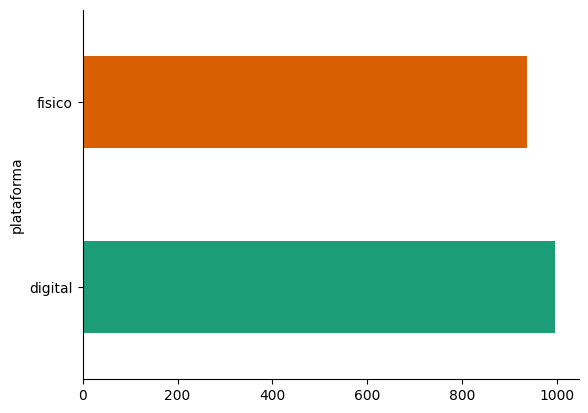

In [74]:
# @title plataforma

from matplotlib import pyplot as plt
import seaborn as sns
data_combi_completa.groupby('plataforma').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

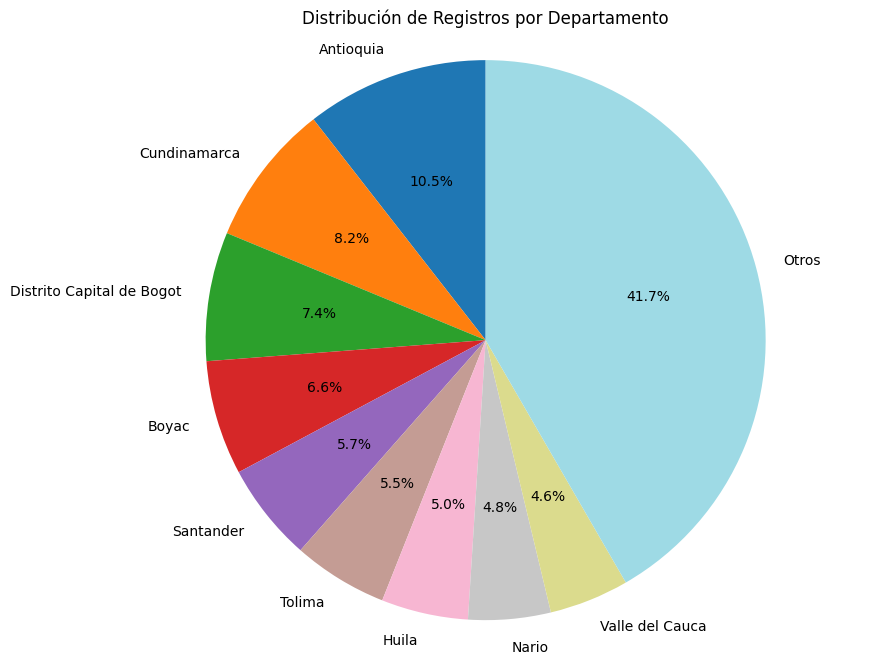

In [89]:
# Agrupar los 9 primeros departamentos y combinar el resto como 'Otros'
top_9_departamentos = departamento_counts.head(9)
otros_departamentos = departamento_counts[9:].sum()
top_9_departamentos['Otros'] = otros_departamentos

# Graficar un gráfico circular de los 9 principales departamentos y 'Otros'
plt.figure(figsize=(10, 8))
top_9_departamentos.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Distribución de Registros por Departamento')
plt.ylabel('')
plt.axis('equal')
plt.show()

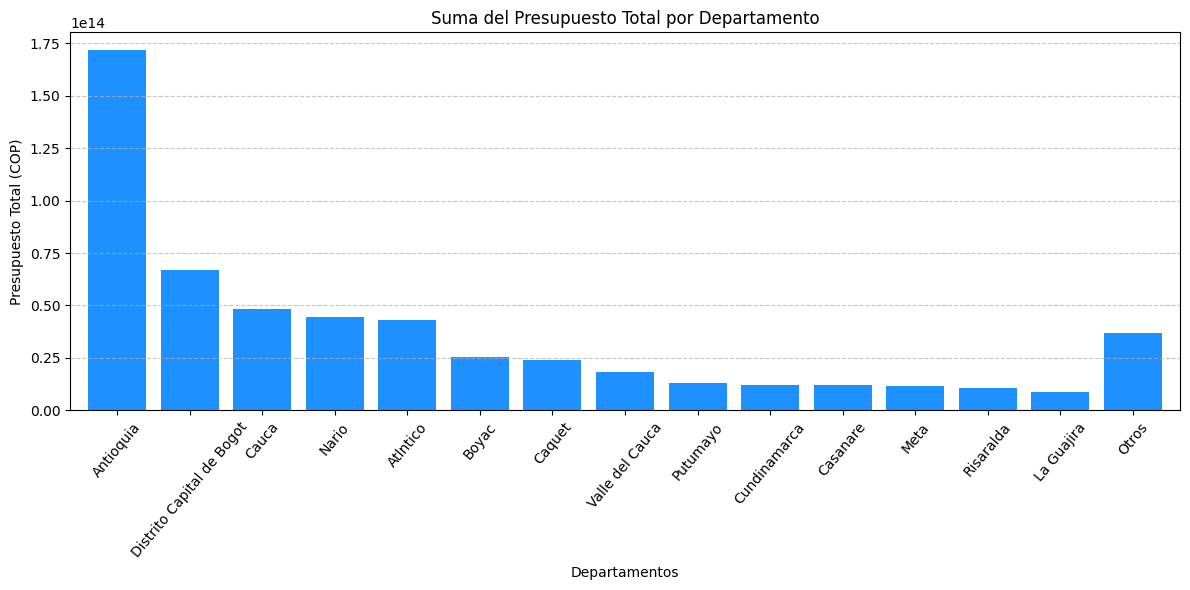

In [110]:
# Calcular la suma del presupuesto total por departamento
presupuesto_departamento = data_combi_completa.groupby('departamento_paa')['presupuesto_total'].sum().sort_values(ascending=False)

# Seleccionan los 14 primeros departamentos y agrupar el resto como 'Otros'
presupuesto_departamento_14 = presupuesto_departamento.head(14)
otros_presupuesto = presupuesto_departamento[14:].sum()
presupuesto_departamento_14['Otros'] = otros_presupuesto

# Gráfico
plt.figure(figsize=(12, 6))
presupuesto_departamento_14.plot(kind='bar', color='#1E90FF', width=0.8)
plt.title('Suma del Presupuesto Total por Departamento')
plt.xlabel('Departamentos')
plt.ylabel('Presupuesto Total (COP)')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1600x700 with 0 Axes>

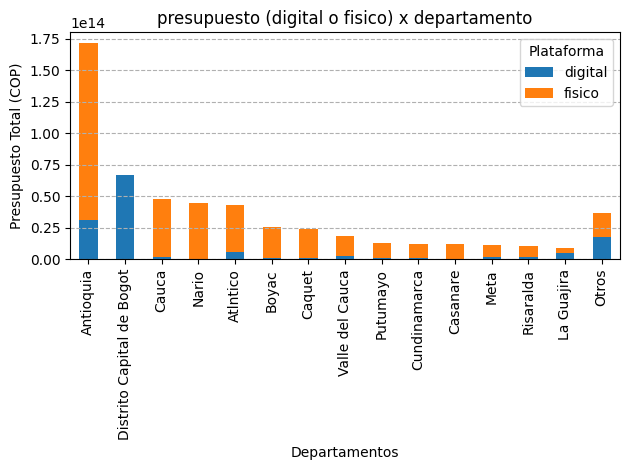

In [118]:
# Calcular la suma del presupuesto total por departamento y plataforma (físico o digital)
presupuesto_por_depto_plataforma = data_combi_completa.groupby(['departamento_paa', 'plataforma'])['presupuesto_total'].sum().unstack().fillna(0)

# Seleccionar los 14 primeros departamentos y agrupar el resto como 'Otros'
presupuesto_depar_barra = presupuesto_por_depto_plataforma.sum(axis=1).nlargest(14)
otros_presupuesto_plataforma = presupuesto_por_depto_plataforma.loc[~presupuesto_por_depto_plataforma.index.isin(presupuesto_depar_barra.index)].sum()

# Crear un nuevo DataFrame con los 14 primeros departamentos y 'Otros'
presupuesto_depar_barra = presupuesto_por_depto_plataforma.loc[presupuesto_depar_barra.index]
presupuesto_depar_barra.loc['Otros'] = otros_presupuesto_plataforma

#Gráfico de barras apiladas
plt.figure(figsize=(16, 7))
presupuesto_depar_barra.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('presupuesto (digital o fisico) x departamento')
plt.xlabel('Departamentos')
plt.ylabel('Presupuesto Total (COP)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.legend(title='Plataforma')
plt.show()


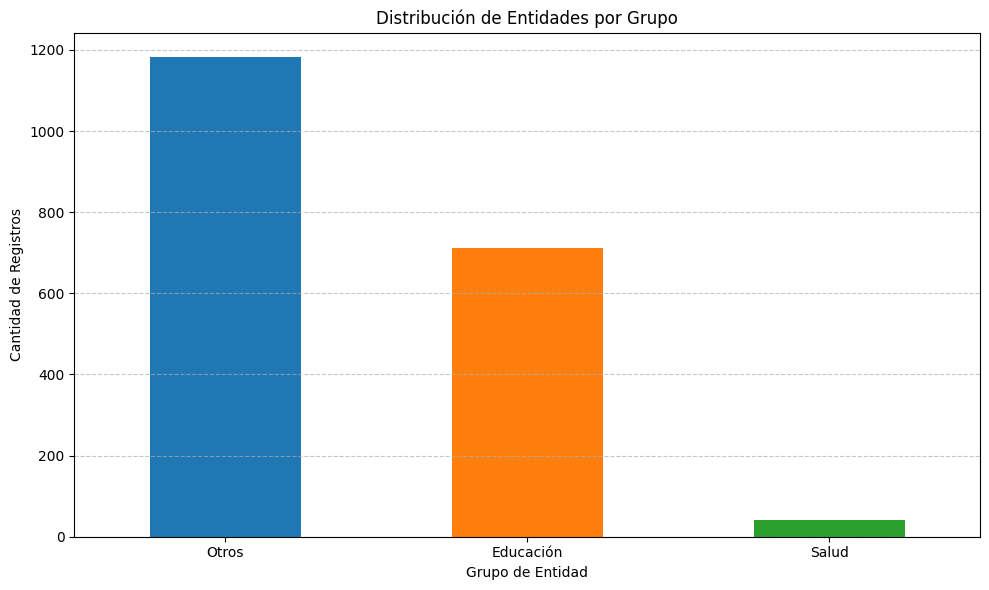

In [119]:
#Para este caso agrupo lo uqe contenga como educación y sus variantes como educación y salud para intentar clasificar los registros que han sido por entidades que al menos en el nombre tiene educación o de salud

# Crear una función para clasificar las entidades en grupos específicos
def clasificar_entidad(nombre):
    nombre = nombre.upper()
    if any(keyword in nombre for keyword in ['EDUCACION', 'EDUCACIN', 'EDUCATIVA', 'EDUCATIVO', 'COLEGIO']):
        return 'Educación'
    elif 'SALUD' in nombre:
        return 'Salud'
    else:
        return 'Otros'

# Aplicar la clasificación a la columna 'nombre_entidad'
data_combi_completa['grupo_entidad'] = data_combi_completa['nombre_entidad'].apply(clasificar_entidad)

# Contar los registros por grupo de entidad
conteo_grupos = data_combi_completa['grupo_entidad'].value_counts()

# Graficar un gráfico de barras con los grupos de entidades
plt.figure(figsize=(10, 6))
conteo_grupos.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribución de Entidades por Grupo')
plt.xlabel('Grupo de Entidad')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [79]:
# filtrar los 7 mayores valores de la columna 'ppto_total'
data_combi_completa.nlargest(7, 'presupuesto_total')

,identificador_unico,anno,nit_entidad,nombre_entidad,correo_x_direccion,telefono_contacto,mision_vision,perspectiva_estrategica,presupuesto_total,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_ultima_modificacion,fecha_creacion_cargue,municipio_paa,departamento_paa,plataforma
666,311082,2022,891900443-4-7,ANTIOQUIA ALCALDA MUNICIPIO DE ANDES,_Calle 49 Arboleda N 49A39 Palacio Municipal,3104010645,Consolidar a Andes como el principal mun...,Estructurar y direccionar al municipio de Ande...,6.279704e+13,$280000000,28000000,2022-01-31,2022-01-31 10:35:26,Andes,Antioquia,fisico
860,259380,2021,No Definido,ANTIOQUIA ALCALDA MUNICIPIO DE COPACABANA,CARRERA 50 No 5015,2740069 ext 110,Misin Estimular y propiciar el desarrollo po...,Potenciar el desarrollo sociocultural poltico ...,5.596688e+13,245784840,24578484,2020-12-31,2021-01-28 02:08:14,Copacabana,Antioquia,fisico
804,323120,2022,800250853-1,CAUCA ALCALDA MUNICIPIO DE PUERTO TEJADA,Calle 17 Con Carrera 19 Esquina Centro Admnist...,8280151,MISION El Municipio de Puerto Tejada cumplir c...,El objetivo fundamental del Plan de Desarrollo...,3.813198e+13,280000000,$28000000,2022-12-06,2022-12-06 02:18:01,Puerto Tejada,Cauca,fisico
575,280913,2021,802011065,ATLNTICO INSTITUCIN UNIVERSITARIA ITSA,Carrera 45 4831 Barranquilla,3112370,MISION La Institucin Universitaria ITSA es un...,En el marco de las acciones prioritarias defin...,2.863783e+13,254387280,25438728,2021-06-21,2021-06-21 05:05:49,Barranquilla,Atlntico,fisico
795,323198,2022,891.200.916-2,NARIO ALCALDA MUNICIPIO DE SAN ANDRS DE TUMACO,CALLE 11 CON CARRERA 9A EDIFICIO MUNICIPAL DE...,7273666,VISIONEn el ao 2023 el Distrito Especial Portu...,ADQUIRIR CON EFICIENCIA Y TRANSPARENCIA BIENES...,2.437590e+13,450000000,45000000,2022-11-28,2022-12-07 05:41:40,San Andres de Tumaco,Nario,fisico
688,256437,2021,800019112-4,NARIO ALCALDA MUNICIPIO DE LOS ANDES,CARRERA 4 No 4 11 PARQUE PRINCIPAL MUNICIPIO...,3226340267,MISINConstruir un proceso para el desarrollo i...,El Municipio de Los Andes en el periodo 202020...,1.821495e+13,$254838728,$254838728,NaT,2021-01-26 08:24:48,Los Andes,Nario,fisico
720,300449,2022,800095763-4,CAQUET ALCALDA MUNICIPIO DE EL PAUJIL,CARRERA 5 CALLE 5 ESQUINA,4314080 4314090,MISIN En el 2023 el municipio de El Paujil Caq...,Perspectiva estratgica La alcalda municipal cu...,1.733574e+13,$280000000,28000000,2022-01-31,2022-01-30 06:33:29,El Paujil,Caquet,fisico


In [82]:
# ordenar los 7 mayores valores de la columna 'ppto_total' de forma descendente
data_combi_completa.nlargest(7, 'presupuesto_total').sort_values(by='presupuesto_total', ascending=False)

,identificador_unico,anno,nit_entidad,nombre_entidad,correo_x_direccion,telefono_contacto,mision_vision,perspectiva_estrategica,presupuesto_total,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_ultima_modificacion,fecha_creacion_cargue,municipio_paa,departamento_paa,plataforma
666,311082,2022,891900443-4-7,ANTIOQUIA ALCALDA MUNICIPIO DE ANDES,_Calle 49 Arboleda N 49A39 Palacio Municipal,3104010645,Consolidar a Andes como el principal mun...,Estructurar y direccionar al municipio de Ande...,6.279704e+13,$280000000,28000000,2022-01-31,2022-01-31 10:35:26,Andes,Antioquia,fisico
860,259380,2021,No Definido,ANTIOQUIA ALCALDA MUNICIPIO DE COPACABANA,CARRERA 50 No 5015,2740069 ext 110,Misin Estimular y propiciar el desarrollo po...,Potenciar el desarrollo sociocultural poltico ...,5.596688e+13,245784840,24578484,2020-12-31,2021-01-28 02:08:14,Copacabana,Antioquia,fisico
804,323120,2022,800250853-1,CAUCA ALCALDA MUNICIPIO DE PUERTO TEJADA,Calle 17 Con Carrera 19 Esquina Centro Admnist...,8280151,MISION El Municipio de Puerto Tejada cumplir c...,El objetivo fundamental del Plan de Desarrollo...,3.813198e+13,280000000,$28000000,2022-12-06,2022-12-06 02:18:01,Puerto Tejada,Cauca,fisico
575,280913,2021,802011065,ATLNTICO INSTITUCIN UNIVERSITARIA ITSA,Carrera 45 4831 Barranquilla,3112370,MISION La Institucin Universitaria ITSA es un...,En el marco de las acciones prioritarias defin...,2.863783e+13,254387280,25438728,2021-06-21,2021-06-21 05:05:49,Barranquilla,Atlntico,fisico
795,323198,2022,891.200.916-2,NARIO ALCALDA MUNICIPIO DE SAN ANDRS DE TUMACO,CALLE 11 CON CARRERA 9A EDIFICIO MUNICIPAL DE...,7273666,VISIONEn el ao 2023 el Distrito Especial Portu...,ADQUIRIR CON EFICIENCIA Y TRANSPARENCIA BIENES...,2.437590e+13,450000000,45000000,2022-11-28,2022-12-07 05:41:40,San Andres de Tumaco,Nario,fisico
688,256437,2021,800019112-4,NARIO ALCALDA MUNICIPIO DE LOS ANDES,CARRERA 4 No 4 11 PARQUE PRINCIPAL MUNICIPIO...,3226340267,MISINConstruir un proceso para el desarrollo i...,El Municipio de Los Andes en el periodo 202020...,1.821495e+13,$254838728,$254838728,NaT,2021-01-26 08:24:48,Los Andes,Nario,fisico
720,300449,2022,800095763-4,CAQUET ALCALDA MUNICIPIO DE EL PAUJIL,CARRERA 5 CALLE 5 ESQUINA,4314080 4314090,MISIN En el 2023 el municipio de El Paujil Caq...,Perspectiva estratgica La alcalda municipal cu...,1.733574e+13,$280000000,28000000,2022-01-31,2022-01-30 06:33:29,El Paujil,Caquet,fisico


<Axes: title={'center': '7 mayores valores del Presupuesto Total'}>

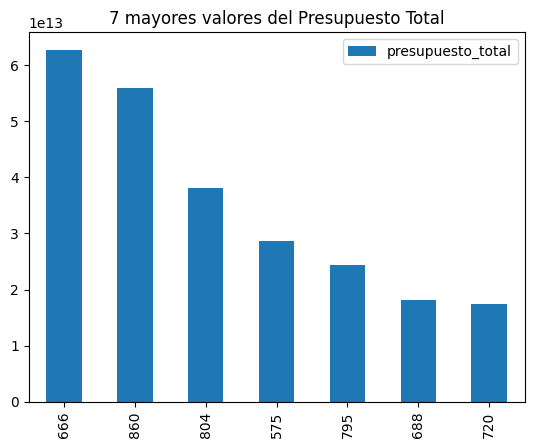

In [83]:
# visualizar los 7 mayores valores de la columna 'ppto_total' de forma ascendente en un Grafico de Barras
top_7 = data_combi_completa.nlargest(7, 'presupuesto_total').sort_values(by='presupuesto_total', ascending=False)
top_7.plot(kind='bar', y='presupuesto_total', title='7 mayores valores del Presupuesto Total')
# Since 'ppto_total' is the index, you don't need to specify x. Use y to indicate the values to plot.

<Axes: title={'center': '7 mayores valores del Presupuesto Total'}, ylabel='presupuesto_total'>

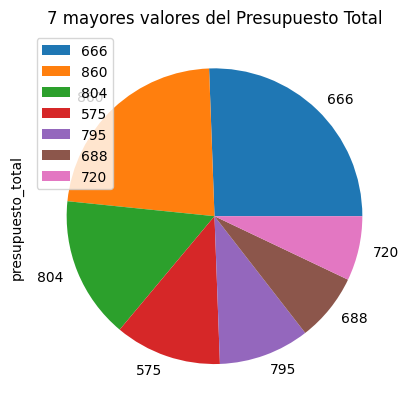

In [85]:
# visualizar los 7 mayores valores de la columna 'presupuesto_total' de forma ascendente en un Grafico de Pastel
data_combi_completa.nlargest(7, 'presupuesto_total').sort_values(by='presupuesto_total', ascending=False).plot(kind='pie', y='presupuesto_total', title='7 mayores valores del Presupuesto Total')

<Axes: title={'center': '7 mayores valores del Presupuesto Total'}, xlabel='presupuesto_total', ylabel='presupuesto_total'>

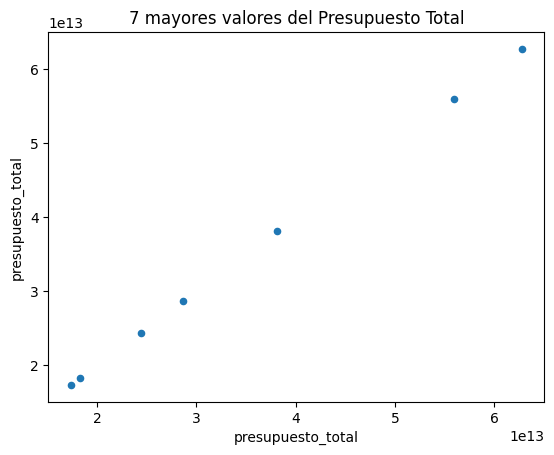

In [86]:
# visualizar los 7 mayores valores de la columna 'presupuesto_total' de forma ascendente en un grafico de dispersión
data_combi_completa.nlargest(7, 'presupuesto_total').sort_values(by='presupuesto_total', ascending=False).plot(kind='scatter', x='presupuesto_total', y='presupuesto_total', title='7 mayores valores del Presupuesto Total')